# Importing libraries and final dataset from the previous notebook

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [3]:
df = pd.read_csv('../DataSets/final_dataset.csv')

# Basic Information

In [5]:
df.shape

(235, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            235 non-null    object 
 1   home_team       235 non-null    object 
 2   away_team       235 non-null    object 
 3   home_score      235 non-null    int64  
 4   away_score      235 non-null    int64  
 5   home_xg         235 non-null    float64
 6   away_xg         235 non-null    float64
 7   home_yc         235 non-null    int64  
 8   away_yc         235 non-null    int64  
 9   home_team_elo   235 non-null    int64  
 10  away_team_elo   235 non-null    int64  
 11  elo_diff        235 non-null    int64  
 12  winner          235 non-null    int64  
 13  home_qualified  235 non-null    int64  
 14  away_qualified  235 non-null    int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 27.7+ KB


In [7]:
df.isna().sum()

date              0
home_team         0
away_team         0
home_score        0
away_score        0
home_xg           0
away_xg           0
home_yc           0
away_yc           0
home_team_elo     0
away_team_elo     0
elo_diff          0
winner            0
home_qualified    0
away_qualified    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,home_score,away_score,home_xg,away_xg,home_yc,away_yc,home_team_elo,away_team_elo,elo_diff,winner,home_qualified,away_qualified
count,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000
mean,1.489362,1.034043,1.485787,1.264085,1.902128,2.136170,34.557447,44.957447,-10.400000,1.025532,0.808511,0.689362
std,1.359870,0.990829,0.829687,0.799372,1.285602,1.416693,32.349585,36.884874,44.659031,0.750632,0.394313,0.463743
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-151.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.800000,0.685000,1.000000,1.000000,11.000000,16.000000,-35.000000,0.000000,1.000000,0.000000
50%,1.000000,1.000000,1.400000,1.180000,2.000000,2.000000,23.000000,37.000000,-10.000000,1.000000,1.000000,1.000000
75%,2.000000,2.000000,2.100000,1.625000,3.000000,3.000000,53.000000,64.000000,14.000000,2.000000,1.000000,1.000000
max,7.000000,4.000000,4.000000,5.700000,7.000000,11.000000,163.000000,167.000000,151.000000,2.000000,1.000000,1.000000


# WIN Proportions

In [11]:
df.head()

,date,home_team,away_team,home_score,away_score,home_xg,away_xg,home_yc,away_yc,home_team_elo,away_team_elo,elo_diff,winner,home_qualified,away_qualified
0,2022-11-20 19:00:00,qatar,ecuador,0,2,0.3,1.2,4,2,53,44,9,2,1,1
1,2022-11-21 16:00:00,england,iran,6,2,2.1,1.4,0,2,4,26,-22,1,1,1
2,2022-11-21 19:00:00,senegal,netherlands,0,2,0.9,0.7,2,1,18,7,11,2,1,1
3,2022-11-21 22:00:00,united states,wales,1,1,0.8,1.5,4,2,16,30,-14,0,1,0
4,2022-11-22 13:00:00,argentina,saudi arabia,1,2,2.2,0.1,0,6,2,63,-61,2,1,1


In [12]:
print('1-Home team, 2-Away team, 0-Draw')
df['winner'].value_counts()

1-Home team, 2-Away team, 0-Draw


winner
1    103
2     69
0     63
Name: count, dtype: int64

In [13]:
#check if it is balanced
df['winner_label'] = df['winner'].map({1: 'Home win', 2 : 'Away win', 0 : 'draw'})
percantage = (df['winner_label'].value_counts() / len(df['winner_label']) * 100).round(2)
print(percantage.astype(str) + '%')

winner_label
Home win    43.83%
Away win    29.36%
draw        26.81%
Name: count, dtype: object


Text(0.5, 1.0, 'Distribution of Match Results')

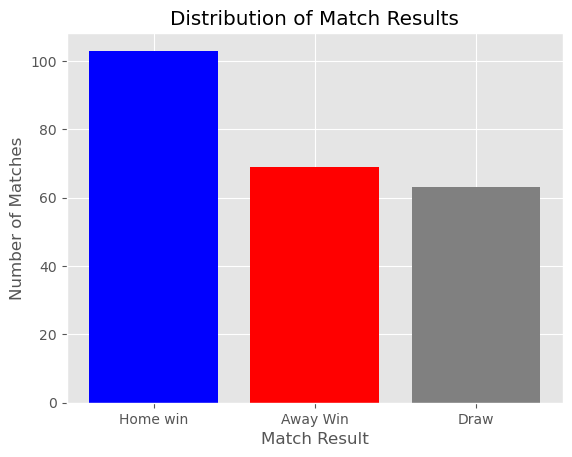

In [14]:
df['winner_label'] = df['winner'].map({1: 'Home win', 2: 'Away Win', 0: 'Draw'})
counts = df['winner_label'].value_counts()

plt.bar(counts.index, counts.values, color=['blue', 'red', 'gray'])
plt.xlabel('Match Result')
plt.ylabel('Number of Matches')
plt.title('Distribution of Match Results')

# Score Analysis

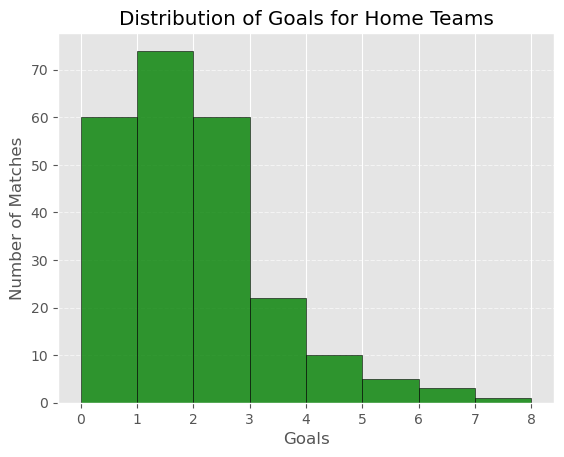

In [16]:
bins = range(df['home_score'].min(), df['home_score'].max() + 2)
plt.hist(df['home_score'], bins = bins, color = 'green', alpha = 0.8, edgecolor = 'black')
plt.xticks(bins)
plt.title("Distribution of Goals for Home Teams")
plt.xlabel("Goals")
plt.ylabel("Number of Matches")
plt.grid(axis='y', linestyle='--', alpha=0.6)

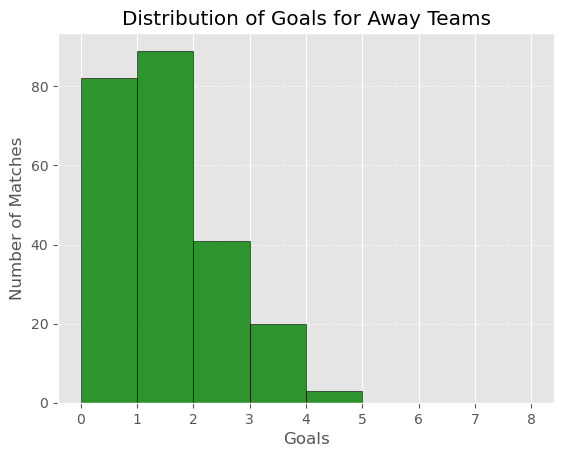

In [17]:
bins = range(0,9)
plt.hist(df['away_score'], bins = bins, color = 'green', alpha = 0.8, edgecolor = 'black')
plt.xticks(bins)
plt.title("Distribution of Goals for Away Teams")
plt.xlabel("Goals")
plt.ylabel("Number of Matches")
plt.grid(axis='y', linestyle='--', alpha=0.6)

In [18]:
df['total_goals'] = df['home_score'] + df['away_score']
average_goals = df['total_goals'].mean()
print(f"Average total goals per match: {average_goals:.2f}")

Average total goals per match: 2.52


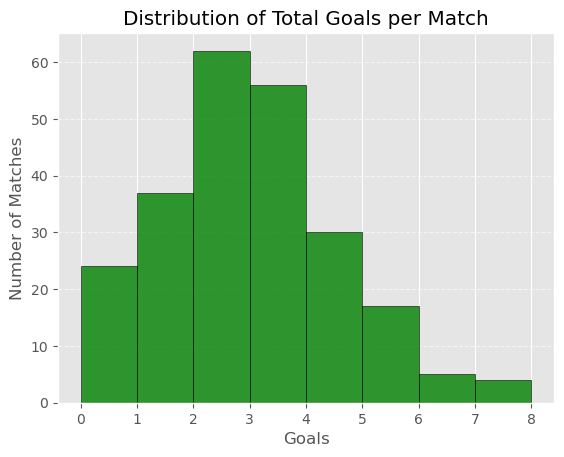

In [19]:
bins = range(0,9)
plt.hist(df['total_goals'], bins = bins, color = 'green', alpha = 0.8, edgecolor = 'black')
plt.xticks(bins)
plt.title("Distribution of Total Goals per Match")
plt.xlabel("Goals")
plt.ylabel("Number of Matches")
plt.grid(axis='y', linestyle='--', alpha=0.6)

In [20]:
max_home = df.loc[df['home_score'].idxmax()]

print(
    f"Maximum Goals for Home Team: {max_home['home_score']} "
    f"({max_home['home_team']} vs {max_home['away_team']})"
    f" — Score: {max_home['home_score']} - {max_home['away_score']}"
)

Maximum Goals for Home Team: 7 (spain vs costa rica) — Score: 7 - 0


In [21]:
max_away = df.loc[df['away_score'].idxmax()]

print(
    f"Maximum Goals for Away Team: {max_away['away_score']} "
    f"({max_away['home_team']} vs {max_away['away_team']})"
    f" — Score: {max_away['home_score']} - {max_away['away_score']}"
)

Maximum Goals for Away Team: 4 (costa rica vs germany) — Score: 2 - 4


# xG Analysis

In [23]:
average_xg_home = df['home_xg'].mean()
average_home_score = df['home_score'].mean()

print(
    f"Average Home xG:     {average_xg_home:}\n"
    f"Average Home Goals:  {average_home_score:}\n"
    f"Difference (xG - Goals): {average_xg_home - average_home_score:}"
)

Average Home xG:     1.4857872340425533
Average Home Goals:  1.4893617021276595
Difference (xG - Goals): -0.003574468085106197


In [24]:
average_xg_away = df['away_xg'].mean()
average_away_score = df['away_score'].mean()

print(
    f"Average Away xG:     {average_xg_away:}\n"
    f"Average Away Goals:  {average_away_score:}\n"
    f"Difference (xG - Goals): {average_xg_away - average_away_score:}"
)

Average Away xG:     1.264085106382979
Average Away Goals:  1.0340425531914894
Difference (xG - Goals): 0.23004255319148958


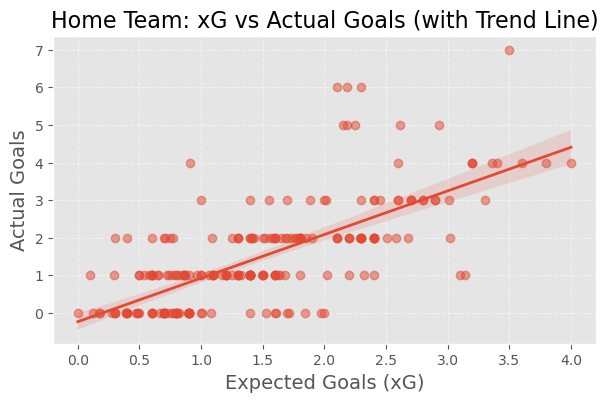

In [25]:
plt.figure(figsize=(7,4))
sns.regplot(
    x=df['home_xg'],
    y=df['home_score'],
    scatter_kws={'alpha':0.5},
    line_kws={'linewidth':2}
)

plt.title("Home Team: xG vs Actual Goals (with Trend Line)", fontsize=16)
plt.xlabel("Expected Goals (xG)", fontsize=14)
plt.ylabel("Actual Goals", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

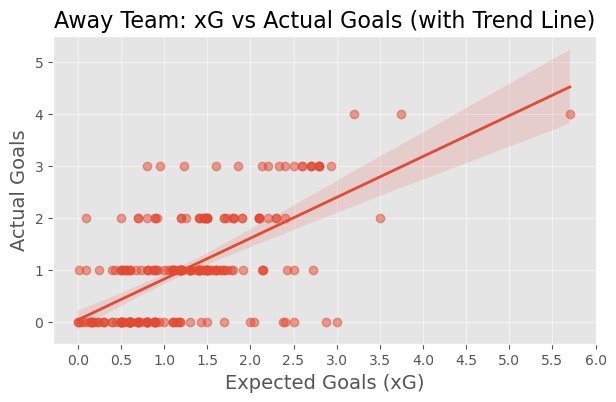

In [26]:
xmin = df['away_xg'].min()
xmax = df['away_xg'].max()

plt.figure(figsize=(7, 4))
sns.regplot(
    x=df['away_xg'],
    y=df['away_score'],
    scatter_kws={'alpha':0.5},
    line_kws={'linewidth':2}
)

plt.xticks(np.arange(0, xmax + 0.5, 0.5)) 
plt.title("Away Team: xG vs Actual Goals (with Trend Line)", fontsize=16)
plt.xlabel("Expected Goals (xG)", fontsize=14)
plt.ylabel("Actual Goals", fontsize=14)
plt.grid(True, alpha=0.5)
plt.show()

#Shadow it is confidence interval

# Lucky Teams (Where xG < )

In [28]:
df['home_overperf'] = df['home_score'] - df['home_xg']
df['away_overperf'] = df['away_score'] - df['away_xg']

big_home_overperf = df[df['home_overperf'] >= 1.5]
big_away_overperf = df[df['away_overperf'] >= 1.5]

In [29]:
for _, row in big_home_overperf.iterrows():
    print(f"{row['home_team']} {row['home_score']} - {row['away_score']} {row['away_team']}")
    print(f"  xG: {row['home_xg']} vs goals: {row['home_score']} (over by {row['home_overperf']:.2f})")

england 6 - 2 iran
  xG: 2.1 vs goals: 6 (over by 3.90)
spain 7 - 0 costa rica
  xG: 3.5 vs goals: 7 (over by 3.50)
argentina 2 - 0 mexico
  xG: 0.3 vs goals: 2 (over by 1.70)
france 3 - 1 poland
  xG: 1.4 vs goals: 3 (over by 1.60)
england 3 - 0 senegal
  xG: 1.0 vs goals: 3 (over by 2.00)
portugal 6 - 1 switzerland
  xG: 2.3 vs goals: 6 (over by 3.70)
united states 5 - 0 trinidad and tobago
  xG: 2.61 vs goals: 5 (over by 2.39)
panama 5 - 2 guadeloupe
  xG: 2.18 vs goals: 5 (over by 2.82)
canada 6 - 0 honduras
  xG: 2.18 vs goals: 6 (over by 3.82)
panama 4 - 1 jamaica
  xG: 0.91 vs goals: 4 (over by 3.09)
uruguay 5 - 0 bolivia
  xG: 2.93 vs goals: 5 (over by 2.07)
costa rica 2 - 1 paraguay
  xG: 0.4 vs goals: 2 (over by 1.60)
colombia 5 - 0 panama
  xG: 2.25 vs goals: 5 (over by 2.75)
germany 5 - 1 scotland
  xG: 2.15 vs goals: 5 (over by 2.85)


In [30]:
for _, row in big_away_overperf.iterrows():
    print(f"{row['home_team']} {row['home_score']} - {row['away_score']} {row['away_team']}")
    print(f"  xG: {row['away_xg']} vs goals: {row['away_score']} (over by {row['away_overperf']:.2f})")

argentina 1 - 2 saudi arabia
  xG: 0.1 vs goals: 2 (over by 1.90)
qatar 1 - 3 senegal
  xG: 0.8 vs goals: 3 (over by 2.20)
canada 1 - 2 morocco
  xG: 0.5 vs goals: 2 (over by 1.50)
bolivia 1 - 3 panama
  xG: 1.23 vs goals: 3 (over by 1.77)
netherlands 2 - 3 austria
  xG: 0.95 vs goals: 3 (over by 2.05)


# Elo Ratings

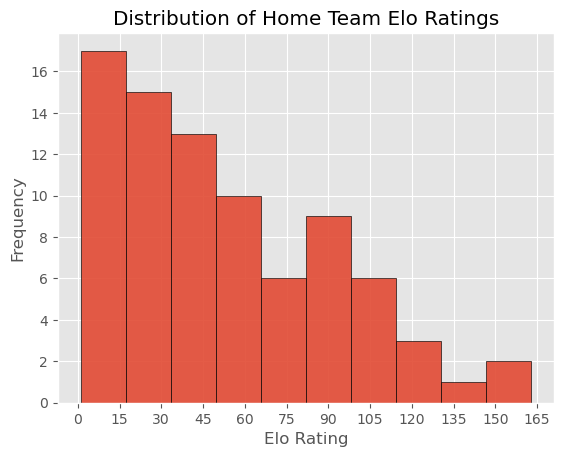

In [32]:
plt.hist(df['home_team_elo'].unique(), bins=10, edgecolor='black', alpha = 0.9)
plt.xticks(np.arange(0, 175, 15))
plt.xlabel("Elo Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Home Team Elo Ratings")
plt.show()

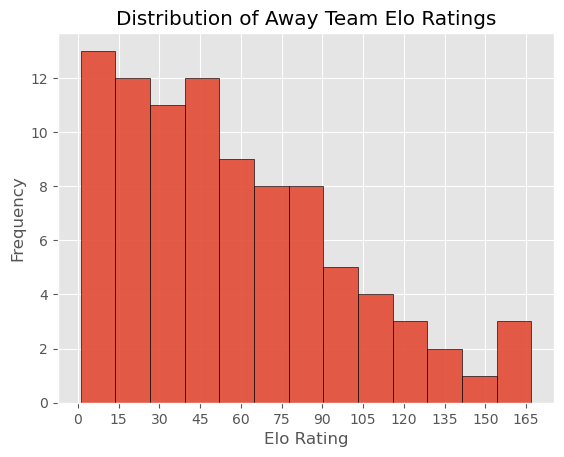

In [33]:
plt.hist(df['away_team_elo'].unique(), bins = 13, edgecolor='black', alpha=0.9)
plt.xticks(np.arange(0, 180, 15))
plt.xlabel("Elo Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Away Team Elo Ratings")
plt.show()

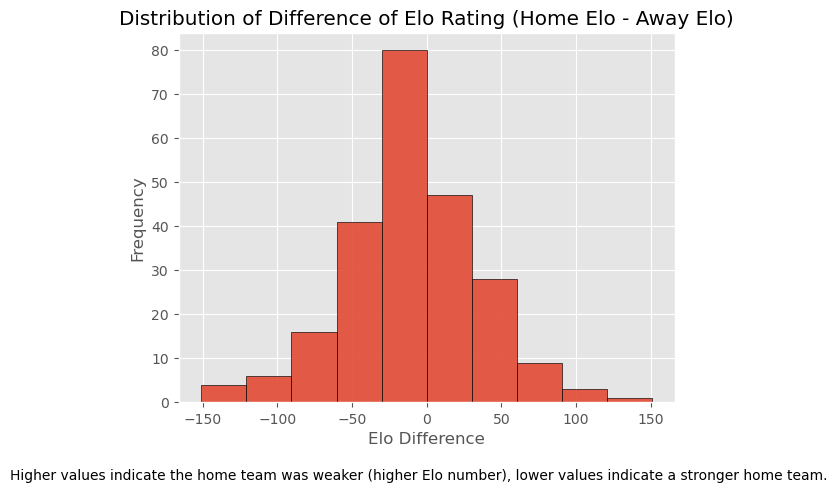

In [34]:
plt.hist(df['elo_diff'], edgecolor='black', bins = 10, alpha=0.9)
plt.xlabel("Elo Difference")
plt.ylabel("Frequency")
plt.title("Distribution of Difference of Elo Rating (Home Elo - Away Elo)")

plt.figtext(
    0.5, -0.05,
    "Higher values indicate the home team was weaker (higher Elo number), lower values indicate a stronger home team.",
    ha='center'
)
plt.show()

In [35]:
worst_home = df.loc[df['home_team_elo'].idxmax()]
print(f"Home team with the lowest Elo: {worst_home['home_team']} "
      f"with Elo {worst_home['home_team_elo']}")

Home team with the lowest Elo: indonesia with Elo 163


In [36]:
worst_away = df.loc[df['away_team_elo'].idxmax()] #idxmax because loc is looking by id and max() return 166 so loc looks for id 166 not the actual id of the worst team
print(f"Home team with the lowest Elo: {worst_away['away_team']} "
      f"with Elo {worst_away['away_team_elo']}")

Home team with the lowest Elo: guadeloupe with Elo 167


In [37]:
qualified_home = df[df['home_qualified'] == 1][['home_team', 'home_team_elo']]
# Drop duplicate teams so each appears once
qualified_home_unique = qualified_home.drop_duplicates(subset='home_team')
# Now calculate average Elo
average_qualified_elo = qualified_home_unique['home_team_elo'].mean()

qualified_away = df[df['away_qualified'] == 1][['away_team', 'away_team_elo']]
qualified_away_unique = qualified_away.drop_duplicates(subset='away_team')
average_qualified_away_elo = qualified_away_unique['away_team_elo'].mean()

print(f"Average Away Team Elo (qualified teams only): {average_qualified_away_elo:.2f}")
print(f"Average Home Team Elo (qualified teams only): {average_qualified_elo:.2f}")
print(f"Average Home and Away Teams Elo (qualified team only): {((average_qualified_away_elo + average_qualified_elo) / 2):.2f}")

Average Away Team Elo (qualified teams only): 31.27
Average Home Team Elo (qualified teams only): 31.27
Average Home and Away Teams Elo (qualified team only): 31.27


# Do qualified teams win more often?

In [39]:
# Boolean column: True if higher Elo team won
df['higher_elo_winner'] = ((df['home_team_elo'] < df['away_team_elo']) & (df['winner'] == 1)) | \
                          ((df['away_team_elo'] < df['home_team_elo']) & (df['winner'] == 2))

df['higher_elo_winner'] = df['higher_elo_winner'].astype(int)

# Count wins
wins = df['higher_elo_winner'].sum()
total_matches = df.shape[0]
win_rate = wins / total_matches * 100

print(f"Higher Elo team wins {wins}/{total_matches} matches ({win_rate:.2f}%)")


Higher Elo team wins 139/235 matches (59.15%)


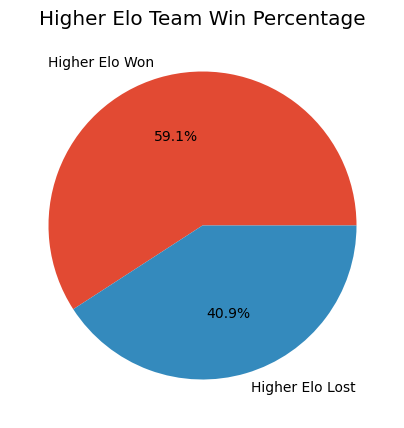

In [40]:
labels = ['Higher Elo Won', 'Higher Elo Lost']
sizes = [wins, total_matches - wins]

plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Higher Elo Team Win Percentage')
plt.show()

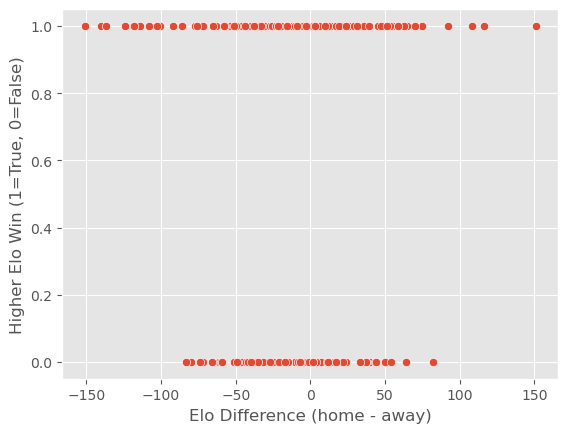

In [41]:
sns.scatterplot(x='elo_diff', y=df['higher_elo_winner'].astype(int), data=df)
plt.xlabel("Elo Difference (home - away)")
plt.ylabel("Higher Elo Win (1=True, 0=False)")
plt.show()

# Discipline

In [43]:
df["total_yc"] = df['home_yc'] + df['away_yc']
max_yc_idx = df['total_yc'].idxmax()
max_yc_match = df.loc[max_yc_idx]
print("Match with most yellow cards:")
print(max_yc_match[['date', 'home_team', 'away_team', 'home_yc', 'away_yc', 'total_yc']])

Match with most yellow cards:
date         2024-06-01 00:00:00
home_team                czechia
away_team                 turkey
home_yc                        5
away_yc                       11
total_yc                      16
Name: 218, dtype: object


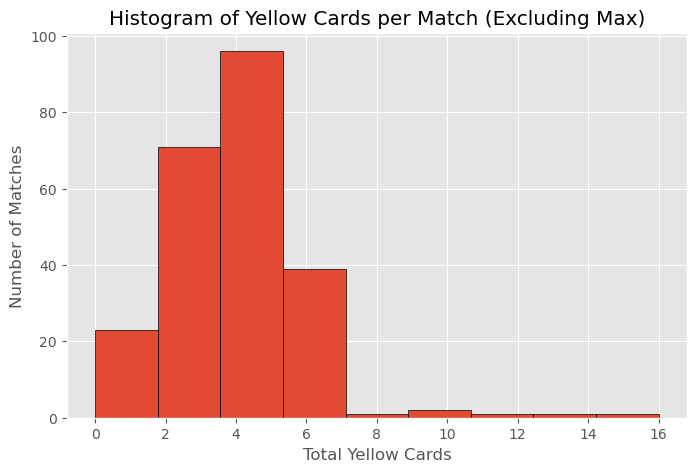

In [44]:
plt.figure(figsize=(8,5))
plt.hist(df['total_yc'], bins=9, edgecolor='black')
plt.xlabel("Total Yellow Cards")
plt.ylabel("Number of Matches")
plt.title("Histogram of Yellow Cards per Match (Excluding Max)")
plt.show()

In [45]:
df['winning_yc'] = np.where(
    df['winner'] == 1, df['home_yc'],
    np.where(df['winner'] == 2, df['away_yc'], np.nan)
)
df['losing_yc'] = np.where(
    df['winner'] == 1, df['away_yc'],
    np.where(df['winner_label'] == 2, df['home_yc'], np.nan)
)

In [46]:
avg_winning_yc = df['winning_yc'].mean()
avg_losing_yc = df['losing_yc'].mean()

print(f"Average yellow cards for losing teams: {avg_losing_yc:.2f}")
print(f"Average yellow cards for winning teams (excluding max YC match): {avg_winning_yc:.2f}")

Average yellow cards for losing teams: 2.29
Average yellow cards for winning teams (excluding max YC match): 1.73


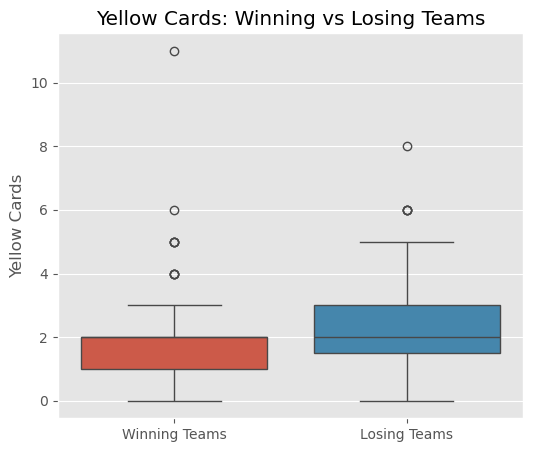

In [47]:
plt.figure(figsize=(6,5))
sns.boxplot(data=df[['winning_yc', 'losing_yc']])
plt.ylabel("Yellow Cards")
plt.title("Yellow Cards: Winning vs Losing Teams")
plt.xticks([0, 1], ['Winning Teams', 'Losing Teams'])
plt.show()

# Qualified Teams 

In [49]:
qualified_teams = pd.unique(
    pd.concat([df.loc[df['home_qualified']==1, 'home_team'],
               df.loc[df['away_qualified']==1, 'away_team']])
)
num_qualified = len(qualified_teams)
print(f"Number of qualified teams: {num_qualified}")
print("Qualified teams:")
print(list(qualified_teams))

Number of qualified teams: 45
Qualified teams:
['qatar', 'england', 'senegal', 'united states', 'argentina', 'denmark', 'mexico', 'france', 'morocco', 'germany', 'spain', 'belgium', 'switzerland', 'uruguay', 'portugal', 'brazil', 'netherlands', 'tunisia', 'poland', 'japan', 'croatia', 'south korea', 'ecuador', 'iran', 'australia', 'saudi arabia', 'canada', 'ghana', 'uzbekistan', 'jordan', 'iraq', 'ivory coast', 'egypt', 'algeria', 'dr congo', 'cape verde', 'south africa', 'haiti', 'panama', 'colombia', 'paraguay', 'italy', 'austria', 'turkey', 'scotland']


In [50]:
qualified_elo_home = df.loc[df['home_team'].isin(qualified_teams), 'home_team_elo']
qualified_elo_away = df.loc[df['away_team'].isin(qualified_teams), 'away_team_elo']
qualified_avg_elo = pd.concat([qualified_elo_home, qualified_elo_away]).mean()
print(f"Average ELO of qualified teams: {qualified_avg_elo:.2f}")

Average ELO of qualified teams: 26.92


In [51]:
df['qualified_winner'] = 0

df.loc[(df['winner'] == 1) & (df['home_qualified'] == 1), 'qualified_winner'] = 1
df.loc[(df['winner'] == 2) & (df['away_qualified'] == 1), 'qualified_winner'] = 1

qualified_win_rate = df['qualified_winner'].mean() * 100

print(f"Qualified teams win {qualified_win_rate:.2f}% of matches.")
wins_by_group = df.groupby('qualified_winner')['winner'].count()
print(wins_by_group)

Qualified teams win 67.66% of matches.
qualified_winner
0     76
1    159
Name: winner, dtype: int64


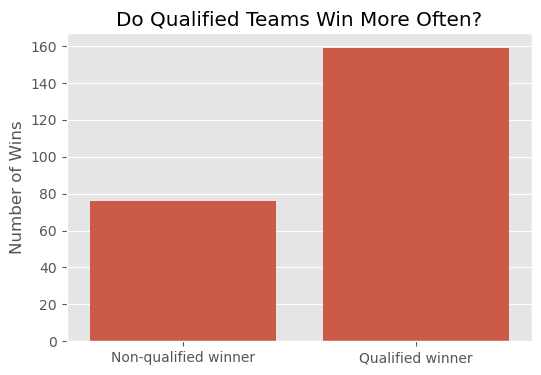

In [52]:
plt.figure(figsize=(6,4))
sns.countplot(x='qualified_winner', data=df)
plt.xticks([0,1], ['Non-qualified winner', 'Qualified winner'])
plt.title("Do Qualified Teams Win More Often?")
plt.xlabel("")
plt.ylabel("Number of Wins")
plt.show()

# Correlation Matrix

In [54]:
corr_matrix = df.corr(numeric_only = True)

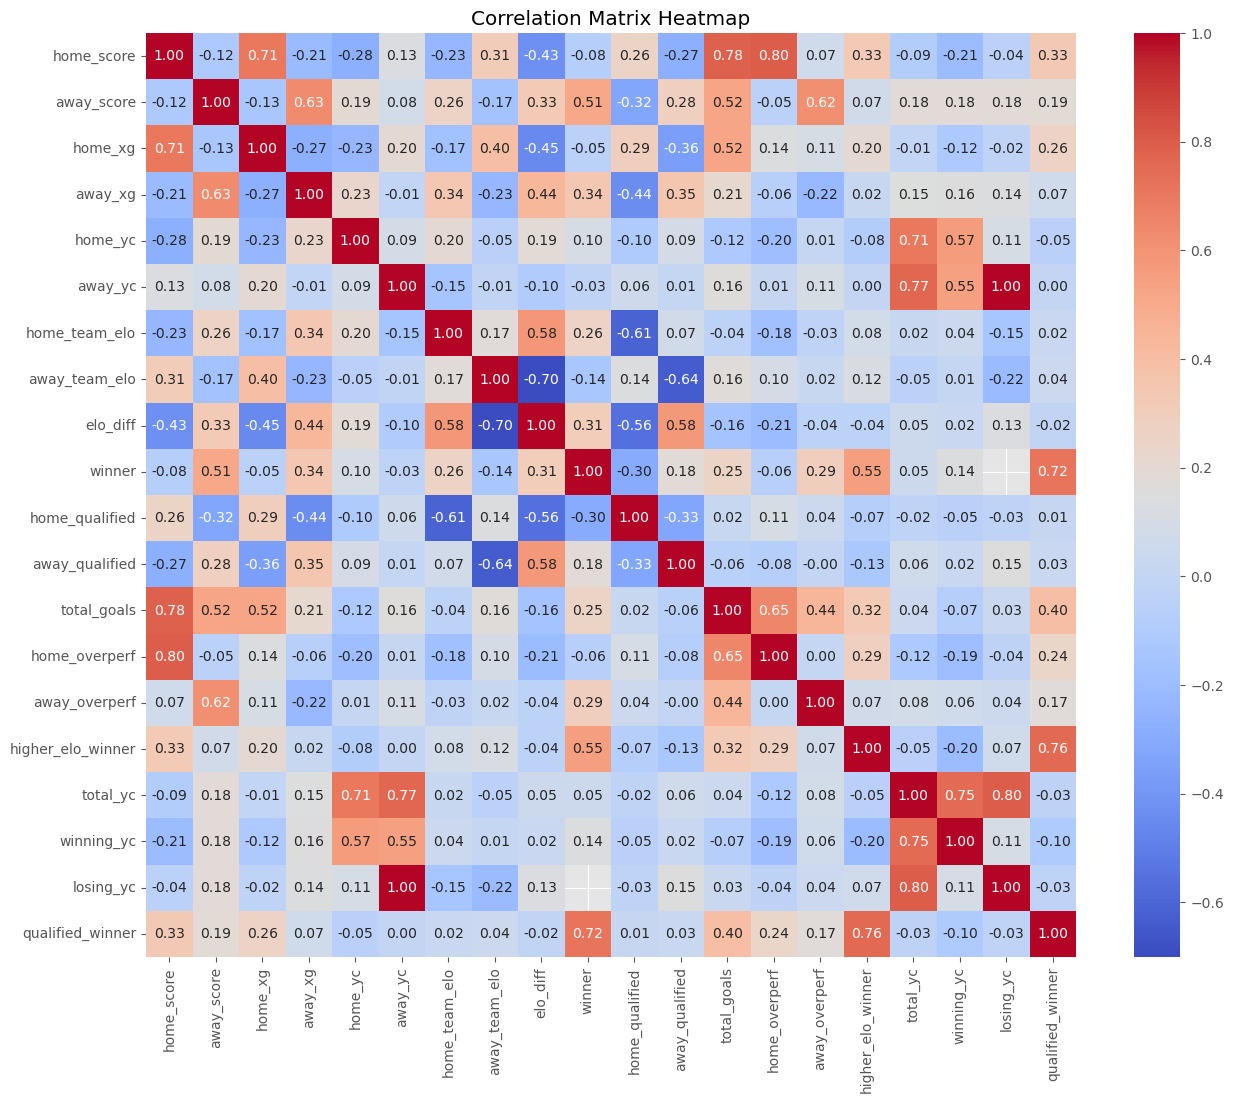

In [55]:
plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [56]:
corr_with_winner = corr_matrix['winner'].drop('winner')  # drop self-correlation
top5_features = corr_with_winner.abs().sort_values(ascending=False).head(5)
print("Top 5 features most correlated with winning:")
print(top5_features)

Top 5 features most correlated with winning:
qualified_winner     0.715825
higher_elo_winner    0.548406
away_score           0.510212
away_xg              0.344393
elo_diff             0.307282
Name: winner, dtype: float64


# Matches per Year

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               235 non-null    object 
 1   home_team          235 non-null    object 
 2   away_team          235 non-null    object 
 3   home_score         235 non-null    int64  
 4   away_score         235 non-null    int64  
 5   home_xg            235 non-null    float64
 6   away_xg            235 non-null    float64
 7   home_yc            235 non-null    int64  
 8   away_yc            235 non-null    int64  
 9   home_team_elo      235 non-null    int64  
 10  away_team_elo      235 non-null    int64  
 11  elo_diff           235 non-null    int64  
 12  winner             235 non-null    int64  
 13  home_qualified     235 non-null    int64  
 14  away_qualified     235 non-null    int64  
 15  winner_label       235 non-null    object 
 16  total_goals        235 non

In [59]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

matches_per_year = df.groupby('year').size()
print("Matches per year:")
print(matches_per_year)

Matches per year:
year
2022     63
2024    149
2025     23
dtype: int64


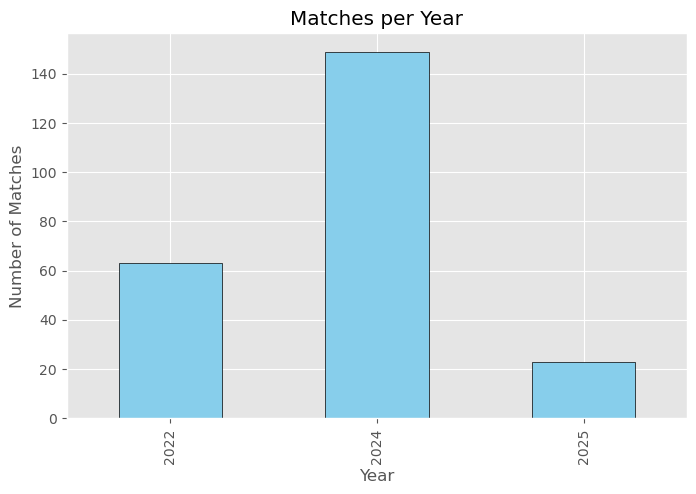

In [60]:
plt.figure(figsize=(8,5))
matches_per_year.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel("Year")
plt.ylabel("Number of Matches")
plt.title("Matches per Year")
plt.show()

In [61]:
df['total_goals'] = df['home_score'] + df['away_score']
goals_per_match_year = df.groupby('year')['total_goals'].mean()
print("Average goals per match per year:")
print(goals_per_match_year)

Average goals per match per year:
year
2022    2.634921
2024    2.456376
2025    2.652174
Name: total_goals, dtype: float64


In [62]:
recent_df = df[df['date'] >= pd.Timestamp.now() - pd.DateOffset(years=2)]
recent_goals_per_match = (recent_df['home_score'] + recent_df['away_score']).mean()
recent_matches_count = recent_df.shape[0]

print(f"Recent matches (last 2 years): {recent_matches_count}")
print(f"Average goals per match in recent matches: {recent_goals_per_match:.2f}")

Recent matches (last 2 years): 172
Average goals per match in recent matches: 2.48


In [63]:
df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score', 'home_xg',
       'away_xg', 'home_yc', 'away_yc', 'home_team_elo', 'away_team_elo',
       'elo_diff', 'winner', 'home_qualified', 'away_qualified',
       'winner_label', 'total_goals', 'home_overperf', 'away_overperf',
       'higher_elo_winner', 'total_yc', 'winning_yc', 'losing_yc',
       'qualified_winner', 'year'],
      dtype='object')